
# <center>`Анализ библиотеки`<a style='color:red'> Insighface</a>

<img src='data/img/insightfacelogo.jpeg' width=300>

___

Ссылки на `документацию`:

| Описание| Ссылка|
| - | -  |
|Pypi Insighface |[*Pypi Insighface*](https://pypi.org/project/insightface/)|
|GitHub  Insighface| [*GitHub Insighface*](https://github.com/deepinsight/insightface)|
|Site  Insighface| [*Insighface*](https://insightface.ai/)|



___
<a id=100>Содержание</a>
- [Краткое описание библиотеки](#1)
- [Обзор основных функций библиотеки](#2)
    - [Детектирование и распознавание лиц](#3)
- [Анализ работы библиотеки](#5)
    - [Датасет](#6)
    - [Анализ функций](#7)
    - [Датафрейм с результатами анализа](#9)

___
## <center><a id=1 >Краткое описание библиотеки</a>

Заявленная точность распознавания:
| Название модели в библиотеке| LFW accuracy|
| :-: | :-:  |
|buffalo_l |`0.9983` |
|buffalo_m |`0.9983` |
|buffalo_s |`0.9970` |
|buffalo_sc |`0.9970` |

В библиотеке использованы решения:

| Название модели в библиотеке | Модель детекции | Модель распознавания | Атрибуты |
| - | - | - | :-: |
| antelopev2 | `SCRFD-10GF` | `ResNet100@Glint360K` | Пол и возраст |
| buffalo_l | `SCRFD-10GF` | `ResNet50@WebFace600K` | Пол и возраст |
| buffalo_m | `SCRFD-2.5GF` | `ResNet50@WebFace600K` | Пол и возраст |
| buffalo_s | `SCRFD-500MF` | `MBF@WebFace600K` | Пол и возраст |
| buffalo_sc | `SCRFD-500MF` | `MBF@WebFace600K` | $\times$ |

Insightface — open‑source набор инструментов для анализа 2D и 3D изображений, реализованный с помощью фреймворков машинного обучения PyTorch и MXNet. Данная библиотека эффективно реализует широкий спектр современных алгоритмов распознавания/детектирования/выравнивания лиц, которые оптимизированы как для обучения, так и для развертывания. Библиотека позволяет для работы предобученной модельи использовать как CPU, так и GPU.

Краткое описание моделей детектирования:

- `SCRFD-10GF`(Single-stage Center Region-based Face Detector with High-Resolution Feature) - одноступенчатый детектор лиц для обнаружения лиц на изображениях с высоким разрешением. Особенности:
    - Используется одна нейронная сеть для детектирования лиц
    - Для определения контура лица используется центрально-региональный подход, что увеличивает точность обнаружения
    - Работает с высоким разрешением признаков

- `SCRFD-2.5GF` (Single-stage Center Region-based Face Detector with 2.5GFlops) - одноступенчатый детектор лиц с учетом ограничения производительности до 2.5 гигафлопс для работы на устройствах с ограниченными ресурсами. Особенности:
    - Используется одна нейронная сеть для детектирования лиц
    - Для определения контура лица используется центрально-региональный подход, что увеличивает точность обнаружения
    - Ограничение производительности позволяет использовать для устройств с ограниченными вычислительными ресурсами.

- `SCRFD-500MF` (Single-stage Center Region-based Face Detector with 500MFlops) -  одноступенчатый детектор лиц с учетом ограничения производительности до 500 мегафлопс, для работы на устройствах с очень ограниченными устройствами (микроконтроллеры, встроенные системы...). Особенности:
    - Используется одна нейронная сеть для детектирования лиц
    - Для определения контура лица используется центрально-региональный подход, что увеличивает точность обнаружения
    - Очень низкие требования к вычислительным ресурсам 

Краткое описание моделей распознавания:

- `ResNet100@Glint360K` - модель нейронной сети, состоящая из 100 слоев, основанная на архитектуре ResNet, обученная на датасете [Glint360K](https://academictorrents.com/details/e5f46ee502b9e76da8cc3a0e4f7c17e4000c7b1e). Датасет содержит 17 091 657 изображений лиц  360 232 человек. Особенности:
    - Архитектура ResNet минимизирует затухание градиента, что позволяет строить глубокие модели
    - Глубокая архитектура позволяет получать высокую точность модели

- `ResNet50@WebFace600K` - модель нейронной сети, состоящая из 50 слоев, основанная на архитектуре ResNet, обученная на датасете **WebFace600K**, который содержит около 600 000 изображений лиц.

- `MBF@WebFace600K` - модель нейронной сети, основанная на архитектуре MBF (Multi-Branch Fusion), использующая механизм мульти-ветвления для объединения информации из различных частей изображения лица, обученная на датасете **WebFace600K**. Особенности:
    - Мульти-ветвление повышает точность распознавания



___
## <center><a id=2 >Обзор основных функций библиотеки</a>

___
### <center><a id=3 >Детектирование и распознавание лиц</a>

- Создание моделей `детектирования` и `распознавания`
    - `providers`: выбор CPU или GPU  
    - `name` : выбор модели детектирования и распознавания лиц
    - `allowed_modules` : выбор модулей для анализа лиц:
        - `detection` : детекция
        - `recognition` : распознавание
        - `landmark_3d_68` : определение 3D контура лица 
        - `landmark_2d_106` : определение 2D контура лица 
        - `genderage` : определение возраста и пола

In [ ]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis(name='buffalo_l' ,providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

- Загрузка изображений

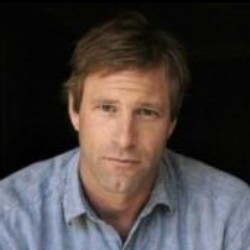

In [385]:
from PIL import Image
import os

db_path = 'data/LFW/Aaron_Eckhart/'
img_names = list(os.walk(db_path))[0][2]
img_path = db_path + img_names[0]

img = Image.open(img_path)
img

- Детектирование лица, создание контура

In [387]:
app.prepare(ctx_id=0, det_thresh=0.5)
img = cv2.imread(img_path)
faces = app.get(img)

# ins_get_image(img_path)
def draw_on(img, faces):
        import cv2
        dimg = img.copy()
        for i in range(len(faces)):
            face = faces[i]
            box = face.bbox.astype(np.int32)
            color = (0, 0, 255)
            cv2.rectangle(dimg, (box[0], box[1]), (box[2], box[3]), color, 2)
            if face.kps is not None:
                kps = face.kps.astype(np.int32)
                #print(landmark.shape)
                for l in range(kps.shape[0]):
                    color = (0, 0, 255)
                    if l == 0 or l == 3:
                        color = (0, 255, 0)
                    cv2.circle(dimg, (kps[l][0], kps[l][1]), 1, color,2)
            if face.gender is not None and face.age is not None:
                cv2.putText(dimg,'%s,%d'%(face.sex,face.age), (box[0]-1, box[1]-4),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,255,0),1)
        return dimg

set det-size: (640, 640)


c:\Users\nazar\AppData\Local\Programs\Python\Python311\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


- Вывод детектированного лица с контуром и характерными точками

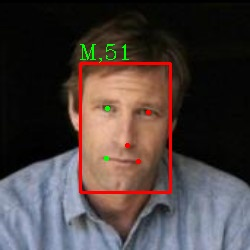

In [388]:
rimgs = draw_on(img, faces)
detected_face_path = 'data/test_images_cropped/test_detection.jpg'
cv2.imwrite(detected_face_path, rimgs)
img = Image.open(detected_face_path)
img

- Получение `эмбеддингов` лица


In [334]:
emb = faces[0]['embedding']
print('Размер эмбеддинга: ', emb.shape)

Размер эмбеддинга:  (512,)


___
## <center><a id=5>Анализ работы библиотеки</a>

___
### <center><a id=6>Датасет</a>
Для анализа работы библиотеки выбран датасет [*Labeled Faces in the Wild (LFW)*](https://vis-www.cs.umass.edu/lfw/#resources).  
Датасет состоит из 13230 изображений  5747 уникальных известных личностей.  
Для анализа библиотеки датасет был уменьшен в объеме: `4862` изображений  `901` уникальных известных личностей

In [342]:
import pandas as pd
import numpy as np
import os


db_path = 'data/LFW/'

def list_images(path):
    """Create default dict with img paths"""
    imgs_list = []
    for dir in os.listdir(path):
        full_path = os.path.join(path, dir)
        for img_name in os.listdir(full_path):
            img_path = os.path.join(full_path, img_name)         
            if img_path.endswith('.png') or img_path.endswith('.jpg') or img_path.endswith('.jpeg') :
                imgs_list.append((img_path, dir))

    return imgs_list

___
#### <<<<<<<< <a style='color:red'>Создание датафрейма исходных данных</a> >>>>>>>>
___

- Из `всего` набора данных

In [343]:
from sklearn.preprocessing import LabelEncoder


list_img = list_images(db_path)
df = pd.DataFrame(list_img, columns=['img_path', 'class_name'])
encoder = LabelEncoder()
labels = encoder.fit_transform(df['class_name'])
df = df.drop(columns='class_name')
df['labels'] = labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13230 entries, 0 to 13229
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  13230 non-null  object
 1   labels    13230 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 155.2+ KB


- `Удаление ошибок` датасета

In [355]:
import pandas as pd


errors = ['Debra_Messing_0002', 'Claire_Hentzen_0001', 'Martha_Bowen_0002', 
    'Sung_Hong_Choi_0001', 'Recep_Tayyip_Erdogan_0004', 'Anja_Paerson_0001', 
        'Janica_Kostelic_0001', 'Bart_Hendricks_0001', 'Carlos_Beltran_0001', 
            'Emmy_Rossum_0001', 'Michael_Schumacher_0008', 'Mahmoud_Abbas_0012', 
            'Andrew_Gilligan_0001', 'Nora_Bendijo_0002', 'Flor_Montulo_0002']

df_cleaned = df.copy()

for error in errors:
    df_cleaned = df_cleaned[~df_cleaned['img_path'].str.contains(error)]


- `Уменьшение` датасета

In [356]:
df_cleaned['row'] = df_cleaned.groupby(['labels']).cumcount()
df_trimmed = df_cleaned[df_cleaned['row'] < 10]
group = df_trimmed.groupby('labels')['labels'].count()
labels = group[group > 2].index
df_trimmed_full = df_trimmed[df_trimmed['labels'].isin(labels)]

df_trimmed_full.reset_index(inplace=True)
df_trimmed_full.drop(columns=['row', 'index'], inplace=True)

- `Статистическая` информация о датасете:

In [357]:
grouped_df = df_trimmed_full.groupby(['labels'])['labels'].agg('count')
print("Количество всего изображений:", df_trimmed_full.shape[0])
print("Среднее количество изображений на одного человека:", int(grouped_df.mean()))
print("Минимальное количество изображений на одного человека:", int(grouped_df.min()))
print("Максимальное количество изображений на одного человека:", int(grouped_df.max()))
print("Количество уникальных людей:", int(grouped_df.shape[0]))

Количество всего изображений: 4859
Среднее количество изображений на одного человека: 5
Минимальное количество изображений на одного человека: 3
Максимальное количество изображений на одного человека: 10
Количество уникальных людей: 900


- `Экспорт` датафрейма в pkl-файл

In [359]:
import pickle

pickle.dump(df_trimmed_full, open('data/Analysis/LFW_trimmed.pkl', 'wb'))

___
### <center><a id=7>Анализ функций</a>

Для анализа функций библиотеки использовались следующие метрики:

- `Embedding_time`: Время (сек.) детектирования лица и создания эмбединга для одного изображения

- `Rank-1 Accuracy`: Усредненное значение accuracy:
    - Рассчитывается accuracy. За предсказание принимается наиболее вероятное отнесение к целевому классу.
    
        -  $\boxed{\frac{TP + TN}{TP + FP + FN + FP}}$

- `Macro_recall`: Усредненное значение recall для мультиклассовых задач:
    - Рассчитывается значение recall для каждого класса :
        - $\boxed{ \frac{TP}{TP + FN} }$
    - Рассчитывется среднее значение recall из всех классов:
        - $\boxed{ \frac{1}{n}\sum_{i=1}^n{(recall_{i})}}$

- `Macro_precision`: Усредненное значение precision для мультиклассовых задач:
    - Рассчитывается значение precision для каждого класса :
        - $\boxed{\frac{TP}{TP + FP}}$

    - Рассчитывется среднее значение precision из всех классов:
        - $\boxed{ \frac{1}{n}\sum_{i=1}^n{(precision_{i})}}$

- `Macro_f1`: Усредненное значение F1 для мультиклассовых задач:
    - Рассчитывается значение F1 для каждого класса :
        - $\boxed{\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}}$

    - Рассчитывется среднее значение F1 из всех классов:
        - $\boxed{ \frac{1}{n}\sum_{i=1}^n{(F1{i})}}$

- `NaN_count`: Количество недетектированных лиц

___
- `Возвращение эмбедингов` insightface:
    - df: Датафрейм
    - model_params: параметры модели
        - 'name': название модели:
            - 'buffalo_sc',
            - 'buffalo_s',
            - 'buffalo_m',
            - 'buffalo_l',
            - 'antelopev2'

- `Создание столбцов с эмбедингами`

In [2]:
from PIL import Image
from insightface.app import FaceAnalysis
from tqdm import trange
import numpy as np
import pandas as pd
import cv2

def get_embedding_list(df: pd.DataFrame, model_params: dict) -> list:

    app = FaceAnalysis(**model_params)
    app.prepare(ctx_id=0, det_thresh=0.5)
    

######## After model init ##########
    emb_list = []
    obj_count = df.count().values[0]
    for obj_num in trange(obj_count, colour='red'):
        try:
            img_path = df['img_path'][obj_num]
            img = cv2.imread(img_path)
            recognition_result = app.get(img)
            img_embedding = recognition_result[0]['embedding']
            emb_list.append(img_embedding)
        except Exception:
            emb_list.append(np.nan)
    return emb_list
    
def get_embedding_column(df: pd.DataFrame, model_params: dict) -> pd.DataFrame:
    pd.options.mode.copy_on_write = True
    emb_list  = get_embedding_list(df, model_params)
    param_name = list(model_params.values())[0]
    df[param_name] = emb_list
    
    return df

___
#### <<<<<<<< <a style='color:red'>Создание столбца эмбеддингов</a> >>>>>>>>
___

In [ ]:
model_params = {'name':'buffalo_s','providers':['CUDAExecutionProvider', 'CPUExecutionProvider'], 'allowed_modules': ['detection', 'recognition']}
df_emb = get_embedding_column(df_trimmed_full[:10], model_params)

___
### <center><a id=9>Датафрейм с результатами анализа</a>

Для каждой анализируемой функции библиотеки:
- Матрица эмбеддингов и массив целевых классов разбивалась при помощи метода `Stratified k-Fold` на 3 части, где каждая часть содержит примерно такое же соотношение целевых классов, как и весь исходный массив целевых классов. Тем самым использовались все данные датасета для получения значений метрик.

- В качестве алгоритма предсказания класса выбран метод взвешанных k-ближайших соседей (`weighted KNN`), который отдает большее преимущество в выборе класса ближайшим "соседям"

- Для подбора оптимального количества "соседей" для получения наилучших метрик качества (recall, precision, F1) использовался метод `Grid SearchCV`

In [1]:
import numpy as np
import pandas as pd


def column_to_matrix(df: pd.DataFrame, column: str, array_size: int=512):
    col = df.loc[:, column]
    matrix = col.to_numpy()[0].reshape(array_size)
    for i in range(1, col.shape[0]):
        array = col.to_numpy()[i].reshape(array_size)
        matrix = np.vstack([matrix , array]) 

    return matrix

In [3]:
import time
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
import sklearn.exceptions


warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
def analysis_models( 
                    df: pd.DataFrame,
                    target_column: str,
                    model_params: dict, 
                    param_grid: dict, 
                    df_path: str='data/Analysis/Analysis_insightface.csv',
                    get_embedding:bool=False,
                    framework:str='Insightface',
                    min_objects:int=3):
    
    param_name = list(model_params.values())[0]
    print(f'Анализ библиотеки > {time.strftime("%H:%M")}')

######## Столбец с эмбеддингами ########
    emb_time = 0
    nan_count = 0
    if get_embedding is True:
        start_time = time.time()
        df = get_embedding_column(df, model_params)
        end_time = time.time()
        emb_time = round((end_time - start_time) / df.shape[0], 2)
        nan_count = df[df[param_name].isna()]['img_path'].count()
    print(f'Эмбеддинги {param_name} добавлены в датафрейм > {time.strftime("%H:%M")}')
        
######## Удаление NaN ########
    befor_drop_size = df.shape[0]
    df = df.dropna()
    df.reset_index(inplace=True,drop=True)
    after_drop_size = df.shape[0]
    print(f'Удалено {befor_drop_size - after_drop_size} объектов NaN')

######## Удаление объектов с минимальным кол-ом в классе ########
    labels_arr = df[target_column].values
    for label in labels_arr:
        if df[(df[target_column] == label)][target_column].count() < min_objects:
            df.drop(labels=df[(df[target_column] == label)][target_column].index, inplace=True)

######## Создание матрицы эмбеддингов ########
    X = column_to_matrix(df, param_name)
    y = df.loc[:, target_column].to_numpy()
    print(f'Размер X: {X.shape} размер y: {y.shape} > {time.strftime("%H:%M")}')

######## Подбор параметров ########
    knn = KNeighborsClassifier(n_jobs=-1, weights='distance')
    grid = GridSearchCV(estimator=knn,
                        cv=StratifiedKFold(3),
                        param_grid=param_grid,
                        scoring=['recall_macro','precision_macro', 'f1_macro'],
                        refit=False,
                        verbose=1)
    grid.fit(X, y)
    
    recall = grid.cv_results_['mean_test_recall_macro'].max()
    i = grid.cv_results_['mean_test_recall_macro'].argmax()
    knn_params_recall = grid.cv_results_['params'][i]

    precision = grid.cv_results_['mean_test_precision_macro'].max()
    i = grid.cv_results_['mean_test_precision_macro'].argmax()
    knn_params_precision = grid.cv_results_['params'][i]

    f1 = grid.cv_results_['mean_test_f1_macro'].max()
    i = grid.cv_results_['mean_test_f1_macro'].argmax()
    knn_params_f1 = grid.cv_results_['params'][i]
    
    grid = GridSearchCV(estimator=knn, 
                        cv=StratifiedKFold(3), 
                        param_grid={'n_neighbors': [1]}, 
                        scoring='accuracy', 
                        refit=False, 
                        verbose=0)
    grid.fit(X, y)
    accuracy = grid.cv_results_['mean_test_score'][0]
    
######## Создание датафрейма ########
    try:
        df_analysis = pd.read_csv(df_path)
        df_temp = pd.DataFrame(data={'Framework': [framework], 'Parameter': [param_name], 'Embedding_time' : [emb_time], 'Rank-1 Accuracy' : [accuracy], 'Macro_recall' : [recall],  'Macro_precision' : [precision], 'Macro_f1' : [f1], 'KNN_params_recall': [knn_params_recall], 'KNN_params_precision': [knn_params_precision], 'KNN_params_f1': [knn_params_f1], 'NaN_count': [nan_count]} )
        df_analysis= pd.concat([df_analysis, df_temp])
        print(f'Данные добавлены в датафрейм {df_path} > {time.strftime("%H:%M")}\n','_'*50)
    except Exception:

        df_analysis = pd.DataFrame(data={'Framework': [framework], 'Parameter': [param_name], 'Embedding_time' : [emb_time], 'Rank-1 Accuracy' : [accuracy], 'Macro_recall' : [recall],  'Macro_precision' : [precision], 'Macro_f1' : [f1], 'KNN_params_recall': [knn_params_recall], 'KNN_params_precision': [knn_params_precision], 'KNN_params_f1': [knn_params_f1], 'NaN_count': [nan_count]} )
        print(f'Создан датафрейм {df_path} > {time.strftime("%H:%M")}\n','_'*50)
    df_analysis.to_csv(df_path, index=False)

___
#### <<<<<<<< <a style='color:red'>Создание датафрейма с анализом</a> >>>>>>>>
___

In [ ]:
import pickle
import pandas as pd
from tqdm import tqdm


df_trimmed_full = pickle.load(open('data/Analysis/LFW_trimmed.pkl', 'rb'))
df_analysis = df_trimmed_full

grid_params = {'n_neighbors': range(1, 4), 'metric': ['cosine', 'l2']}
progbar = tqdm(['buffalo_sc', 'buffalo_s', 'buffalo_m', 'buffalo_l', 'antelopev2'])
for name in progbar:
    model_params = {'name':name,'providers':['CUDAExecutionProvider', 'CPUExecutionProvider'],  'allowed_modules': ['detection', 'recognition']}
    rep = analysis_models(df=df_analysis, target_column='labels',  model_params=model_params, param_grid=grid_params, get_embedding=True)

____
### [К содержанию](#100)
____